In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
df_static = pd.read_csv(r"C:\NIKOLA\SUMO\belgrade\static_signal_control\results.csv")
df_static.head()

,simulation_no,vehicle_time_loss,pedestrian_time_loss
0,1,40.25,43.73
1,2,37.44,44.33
2,3,38.44,44.08
3,4,38.24,43.99
4,5,39.24,44.43


In [14]:
df_actuated = pd.read_csv(r"C:\NIKOLA\SUMO\belgrade\actuated_signal_control\results.csv")
df_actuated.head()

,simulation_no,vehicle_time_loss,pedestrian_time_loss
0,1,40.98,43.38
1,2,38.86,45.17
2,3,36.69,44.08
3,4,34.77,44.30
4,5,37.31,42.14


In [15]:
# --- Helper function to compute 95% confidence interval ---
def mean_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # standard error of the mean
    h = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

In [16]:
# --- Compute statistics for both scenarios ---
veh_mean_s, veh_low_s, veh_high_s = mean_confidence_interval(df_static["vehicle_time_loss"])
veh_mean_a, veh_low_a, veh_high_a = mean_confidence_interval(df_actuated["vehicle_time_loss"])

ped_mean_s, ped_low_s, ped_high_s = mean_confidence_interval(df_static["pedestrian_time_loss"])
ped_mean_a, ped_low_a, ped_high_a = mean_confidence_interval(df_actuated["pedestrian_time_loss"])

In [17]:
# Create summary table
summary_data_vehicles = {
    "Scenario": ["Static", "Actuated"],
    "Vehicle Mean": [veh_mean_s, veh_mean_a],
    "Vehicle 95% CI Lower": [veh_low_s, veh_low_a],
    "Vehicle 95% CI Upper": [veh_high_s, veh_high_a]
}

df_summary_vehicles = pd.DataFrame(summary_data_vehicles)

# Round for clarity
df_summary_vehicles = df_summary_vehicles.round(2)

df_summary_vehicles.head(10)

,Scenario,Vehicle Mean,Vehicle 95% CI Lower,Vehicle 95% CI Upper
0,Static,37.66,37.26,38.06
1,Actuated,36.44,35.55,37.32


In [18]:
# Create summary table
summary_data_pedestrians = {
    "Scenario": ["Static", "Actuated"],
    "Pedestrian Mean": [ped_mean_s, ped_mean_a],
    "Pedestrian 95% CI Lower": [ped_low_s, ped_low_a],
    "Pedestrian 95% CI Upper": [ped_high_s, ped_high_a]
}

df_summary_pedestrians = pd.DataFrame(summary_data_pedestrians)

# Round for clarity
df_summary_pedestrians = df_summary_pedestrians.round(2)

df_summary_pedestrians.head(10)

,Scenario,Pedestrian Mean,Pedestrian 95% CI Lower,Pedestrian 95% CI Upper
0,Static,43.77,43.50,44.05
1,Actuated,43.08,42.78,43.38


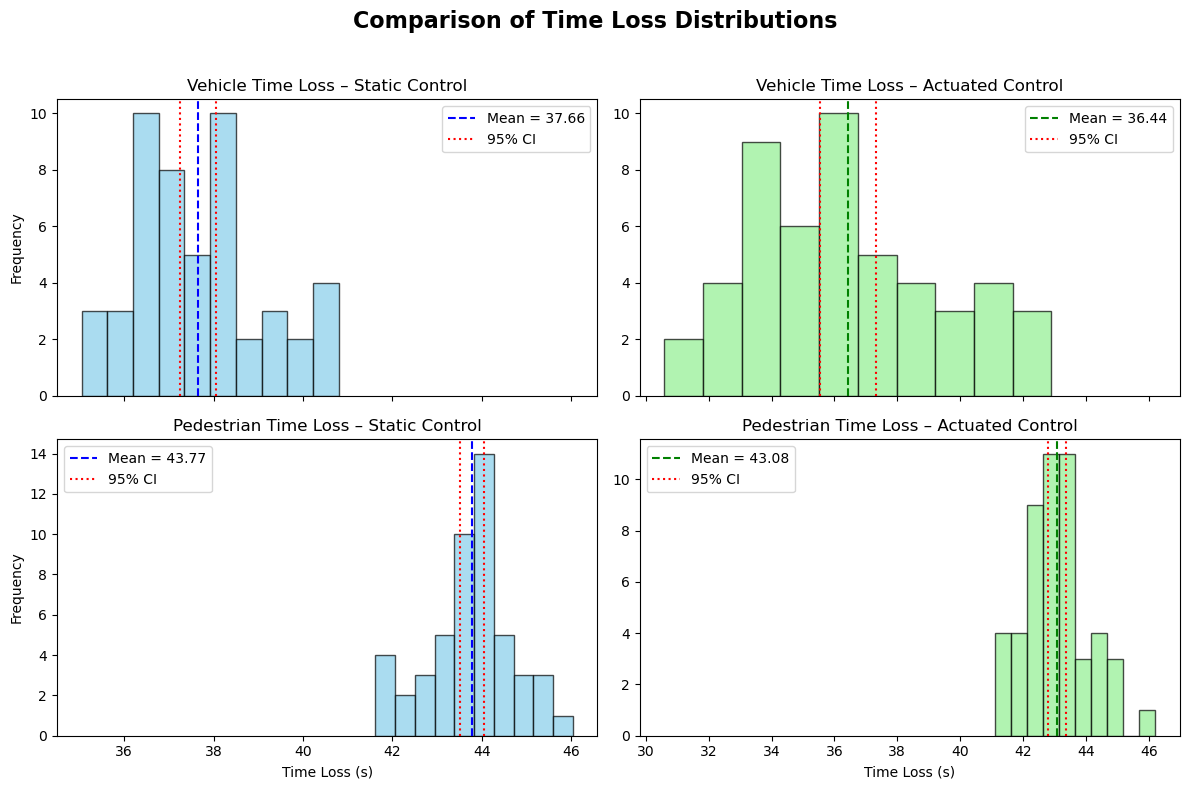

In [19]:
# --- Create figure with 2x2 layout ---
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex='col')
fig.suptitle("Comparison of Time Loss Distributions", fontsize=16, fontweight='bold')

# ======================
# Vehicles
# ======================
# Static control
axs[0, 0].hist(df_static["vehicle_time_loss"], bins=10, color="skyblue", edgecolor="black", alpha=0.7)
axs[0, 0].axvline(veh_mean_s, color="blue", linestyle="--", label=f"Mean = {veh_mean_s:.2f}")
axs[0, 0].axvline(veh_low_s, color="red", linestyle=":", label="95% CI")
axs[0, 0].axvline(veh_high_s, color="red", linestyle=":")
axs[0, 0].set_title("Vehicle Time Loss – Static Control")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].legend()

# Actuated control
axs[0, 1].hist(df_actuated["vehicle_time_loss"], bins=10, color="lightgreen", edgecolor="black", alpha=0.7)
axs[0, 1].axvline(veh_mean_a, color="green", linestyle="--", label=f"Mean = {veh_mean_a:.2f}")
axs[0, 1].axvline(veh_low_a, color="red", linestyle=":", label="95% CI")
axs[0, 1].axvline(veh_high_a, color="red", linestyle=":")
axs[0, 1].set_title("Vehicle Time Loss – Actuated Control")
axs[0, 1].legend()

# ======================
# Pedestrians
# ======================
# Static control
axs[1, 0].hist(df_static["pedestrian_time_loss"], bins=10, color="skyblue", edgecolor="black", alpha=0.7)
axs[1, 0].axvline(ped_mean_s, color="blue", linestyle="--", label=f"Mean = {ped_mean_s:.2f}")
axs[1, 0].axvline(ped_low_s, color="red", linestyle=":", label="95% CI")
axs[1, 0].axvline(ped_high_s, color="red", linestyle=":")
axs[1, 0].set_title("Pedestrian Time Loss – Static Control")
axs[1, 0].set_xlabel("Time Loss (s)")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].legend()

# Actuated control
axs[1, 1].hist(df_actuated["pedestrian_time_loss"], bins=10, color="lightgreen", edgecolor="black", alpha=0.7)
axs[1, 1].axvline(ped_mean_a, color="green", linestyle="--", label=f"Mean = {ped_mean_a:.2f}")
axs[1, 1].axvline(ped_low_a, color="red", linestyle=":", label="95% CI")
axs[1, 1].axvline(ped_high_a, color="red", linestyle=":")
axs[1, 1].set_title("Pedestrian Time Loss – Actuated Control")
axs[1, 1].set_xlabel("Time Loss (s)")
axs[1, 1].legend()

# --- Layout and show ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()